### **0. Set-up**

In [139]:
# Import libraries and utils
%run '../../utils.ipynb'

In [140]:
# Load predicted
raw_predicted = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f8.csv")

# Load actual
raw_actual = pd.read_csv("../../../data/dataset/cleaned-en-simlex-999.csv")

# Drop first three word pairs
raw_actual = raw_actual.iloc[3:].reset_index(drop=True)

In [141]:
# Show results
raw_predicted

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,happy,cheerful,8.75,9.20,7.76,5.26,9.50,9.60,8.66,8.50,9.15,8.57,8.90,8.20,9.80,8.90,8.89
1,hard,easy,4.10,1.73,0.81,3.00,1.67,3.50,4.52,1.14,1.98,2.14,5.65,3.20,6.00,2.33,5.00
2,fast,rapid,9.50,9.60,9.34,9.75,9.80,8.50,9.68,9.21,8.90,9.29,9.50,9.80,9.70,8.20,9.17
3,happy,glad,8.50,8.60,8.47,7.50,9.40,8.80,7.90,8.09,8.00,8.57,7.80,7.60,9.70,8.50,8.89
4,short,long,7.25,7.50,0.71,5.50,9.60,5.50,6.42,7.80,7.34,8.57,8.20,8.80,9.20,7.50,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,join,acquire,7.35,6.60,4.00,3.00,5.12,0.25,6.27,4.38,6.23,6.12,3.93,4.30,3.44,4.00,4.00
992,send,attend,5.30,6.60,2.40,1.00,3.44,0.25,4.44,3.33,4.28,4.65,4.44,4.35,2.09,2.17,3.00
993,gather,attend,6.97,6.00,3.00,1.00,4.20,0.25,5.36,3.33,4.56,4.94,4.21,3.90,2.53,3.52,2.50
994,absorb,withdraw,3.41,3.20,1.80,1.00,2.60,0.25,3.37,2.08,2.67,3.12,2.19,3.40,1.36,5.75,3.00


### **1. Data Quality**

In [142]:
# Basic info
raw_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   word1                996 non-null    object 
 1   word2                996 non-null    object 
 2   similarity_score_1   996 non-null    float64
 3   similarity_score_2   996 non-null    float64
 4   similarity_score_3   996 non-null    float64
 5   similarity_score_4   996 non-null    float64
 6   similarity_score_5   996 non-null    float64
 7   similarity_score_6   996 non-null    float64
 8   similarity_score_7   996 non-null    float64
 9   similarity_score_8   996 non-null    float64
 10  similarity_score_9   996 non-null    float64
 11  similarity_score_10  996 non-null    float64
 12  similarity_score_11  996 non-null    float64
 13  similarity_score_12  996 non-null    float64
 14  similarity_score_13  996 non-null    float64
 15  similarity_score_14  996 non-null    flo

In [143]:
# Missing values per column
raw_predicted.isnull().sum()

word1                  0
word2                  0
similarity_score_1     0
similarity_score_2     0
similarity_score_3     0
similarity_score_4     0
similarity_score_5     0
similarity_score_6     0
similarity_score_7     0
similarity_score_8     0
similarity_score_9     0
similarity_score_10    0
similarity_score_11    0
similarity_score_12    0
similarity_score_13    0
similarity_score_14    0
similarity_score_15    0
dtype: int64

In [144]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word2 Actual', 'Word1 Predicted', 'Word2 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: False


,Word1 Actual,Word2 Actual,Word1 Predicted,Word2 Predicted
70,bad,modern,guilty,ancient
71,modern,new,NaN,NaN
72,new,dull,ancient,funny
73,dull,happy,funny,young
74,happy,easy,young,big
75,easy,great,big,awful
76,great,tiny,awful,huge
77,tiny,polite,huge,proper
78,polite,modest,proper,ashamed
79,modest,exotic,ashamed,rare


In [145]:
raw_predicted.iloc[69:100]
# raw_predicted.tail(10)

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
69,illegal,immoral,7.8,6.50,6.48,5.5,4.77,6.00,6.04,5.13,6.20,9.70,7.00,1.00,7.00,4.80,4.29
70,modern,ancient,0.5,2.50,3.74,2.5,1.22,3.50,5.28,2.55,1.38,0.60,2.00,1.00,1.00,2.11,1.50
71,new,ancient,1.9,1.00,2.55,1.5,0.33,1.00,4.60,2.75,1.58,0.60,1.00,1.00,1.00,1.71,1.50
72,dull,funny,2.5,2.00,2.24,3.0,1.41,2.50,4.13,4.33,3.69,1.00,2.75,1.00,2.00,2.00,1.50
73,happy,young,2.0,2.50,1.94,3.0,1.15,2.50,5.18,2.60,2.77,2.00,2.50,1.00,1.00,1.00,1.50
74,easy,big,2.2,2.00,3.87,2.5,1.48,3.50,2.45,1.40,3.14,1.50,1.00,1.00,2.00,2.00,2.00
75,great,awful,1.0,1.00,1.12,3.0,1.61,2.50,4.65,4.27,4.69,4.00,2.50,1.00,1.00,2.86,1.64
76,tiny,huge,2.5,2.50,7.07,4.0,3.08,3.00,6.08,4.78,5.87,8.00,6.50,1.00,6.00,2.71,5.57
77,polite,proper,6.9,7.50,7.54,7.0,2.65,4.50,6.52,6.59,4.12,9.20,4.50,1.00,8.00,3.29,6.43
78,modest,ashamed,1.5,3.00,2.55,1.0,2.34,5.00,3.73,2.00,4.12,0.10,3.00,1.00,2.00,3.00,4.00


In [146]:
raw_actual.iloc[69:100]
# raw_actual.tail(10)

,word1,word2,SimLex999,std_dev,POS
69,illegal,immoral,4.28,1.57,A
70,bad,guilty,4.20,1.47,A
71,modern,ancient,0.73,0.71,A
72,new,ancient,0.23,0.46,A
73,dull,funny,0.55,1.76,A
74,happy,young,2.00,0.47,A
75,easy,big,1.12,1.22,A
76,great,awful,1.17,1.53,A
77,tiny,huge,0.60,0.59,A
78,polite,proper,7.63,1.42,A


In [147]:
# Define index
row_to_move = 99
new_position = 70 

# Extract the row to move
row = raw_predicted.iloc[row_to_move].copy()

# Drop the row to move
raw_predicted = raw_predicted.drop(index=row_to_move).reset_index(drop=True)

# Insert the row at the new position
raw_predicted = pd.concat([raw_predicted.iloc[:new_position], pd.DataFrame([row]), raw_predicted.iloc[new_position:]]).reset_index(drop=True)

# Show results
raw_predicted.iloc[69:100]

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
69,illegal,immoral,7.8,6.50,6.48,5.5,4.77,6.00,6.04,5.13,6.20,9.70,7.00,1.00,7.00,4.80,4.29
70,bad,guilty,3.0,2.55,3.00,2.0,4.00,2.76,2.10,2.00,0.58,1.00,0.00,0.93,3.21,2.60,2.83
71,modern,ancient,0.5,2.50,3.74,2.5,1.22,3.50,5.28,2.55,1.38,0.60,2.00,1.00,1.00,2.11,1.50
72,new,ancient,1.9,1.00,2.55,1.5,0.33,1.00,4.60,2.75,1.58,0.60,1.00,1.00,1.00,1.71,1.50
73,dull,funny,2.5,2.00,2.24,3.0,1.41,2.50,4.13,4.33,3.69,1.00,2.75,1.00,2.00,2.00,1.50
74,happy,young,2.0,2.50,1.94,3.0,1.15,2.50,5.18,2.60,2.77,2.00,2.50,1.00,1.00,1.00,1.50
75,easy,big,2.2,2.00,3.87,2.5,1.48,3.50,2.45,1.40,3.14,1.50,1.00,1.00,2.00,2.00,2.00
76,great,awful,1.0,1.00,1.12,3.0,1.61,2.50,4.65,4.27,4.69,4.00,2.50,1.00,1.00,2.86,1.64
77,tiny,huge,2.5,2.50,7.07,4.0,3.08,3.00,6.08,4.78,5.87,8.00,6.50,1.00,6.00,2.71,5.57
78,polite,proper,6.9,7.50,7.54,7.0,2.65,4.50,6.52,6.59,4.12,9.20,4.50,1.00,8.00,3.29,6.43


In [148]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word2 Actual', 'Word1 Predicted', 'Word2 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: True
No differences found


### **2. Data Processing**

In [149]:
# Copy dataframe
predicted = raw_predicted.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
predicted['pred_sl'] = predicted[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
predicted['pred_sd'] = predicted[similarity_cols].std(axis=1).round(2)

# Select columns
predicted = predicted[['word1', 'word2', 'pred_sl', 'pred_sd']]

# Show results
predicted

,word1,word2,pred_sl,pred_sd
0,happy,cheerful,8.64,1.08
1,hard,easy,3.12,1.64
2,fast,rapid,9.33,0.48
3,happy,glad,8.42,0.63
4,short,long,7.08,2.15
...,...,...,...,...
991,join,acquire,4.60,1.77
992,send,attend,3.45,1.68
993,gather,attend,3.75,1.78
994,absorb,withdraw,2.61,1.29


In [150]:
# Copy dataframe
actual = raw_actual.copy()

# Rename columns
actual = actual.rename(columns={'SimLex999': 'act_sl', 'std_dev': 'act_sd'})

# Select columns
actual = actual[['word1', 'word2', 'act_sl', 'act_sd']]

# Show results
actual

,word1,word2,act_sl,act_sd
0,happy,cheerful,9.55,2.18
1,hard,easy,0.95,0.93
2,fast,rapid,8.75,1.68
3,happy,glad,9.17,1.59
4,short,long,1.23,1.58
...,...,...,...,...
991,join,acquire,2.85,0.99
992,send,attend,1.67,1.44
993,gather,attend,4.80,1.97
994,absorb,withdraw,2.97,1.75


In [151]:
# Merge predicted and actual DataFrames
merged = pd.merge(predicted, actual, on=['word1', 'word2'])

# Show results
merged

,word1,word2,pred_sl,pred_sd,act_sl,act_sd
0,happy,cheerful,8.64,1.08,9.55,2.18
1,hard,easy,3.12,1.64,0.95,0.93
2,fast,rapid,9.33,0.48,8.75,1.68
3,happy,glad,8.42,0.63,9.17,1.59
4,short,long,7.08,2.15,1.23,1.58
...,...,...,...,...,...,...
991,join,acquire,4.60,1.77,2.85,0.99
992,send,attend,3.45,1.68,1.67,1.44
993,gather,attend,3.75,1.78,4.80,1.97
994,absorb,withdraw,2.61,1.29,2.97,1.75


### **3. Descriptive Statistics**

In [152]:
# Summary statistics SimLex-999
pred_sl_summary = round(predicted['pred_sl'].describe(), 2)
act_sl_summary = round(actual['act_sl'].describe(), 2)

# Add median SimLex-999
pred_sl_summary['median'] = round(predicted['pred_sl'].median(), 2)
act_sl_summary['median'] = round(actual['act_sl'].median(), 2)

# Summary statistics standard deviations
pred_sd_summary = round(predicted['pred_sd'].describe(), 2)
act_sd_summary = round(actual['act_sd'].describe(), 2)

# Add median standard deviation
pred_sd_summary['median'] = round(predicted['pred_sd'].median(), 2)
act_sd_summary['median'] = round(actual['act_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "pred_sl": pred_sl_summary,
    "act_sl": act_sl_summary,
    "pred_sd": pred_sd_summary,
    "act_sd": act_sd_summary
})

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,996.00,996.00,996.00,996.00
mean,4.77,4.56,1.44,1.28
std,2.12,2.61,0.59,0.37
min,0.01,0.23,0.04,0.34
25%,3.14,2.38,1.06,1.08
50%,4.81,4.66,1.43,1.32
75%,6.47,6.74,1.76,1.54
max,9.42,9.80,3.43,2.18
median,4.81,4.66,1.43,1.31


#### **3.1. SimLex-999**

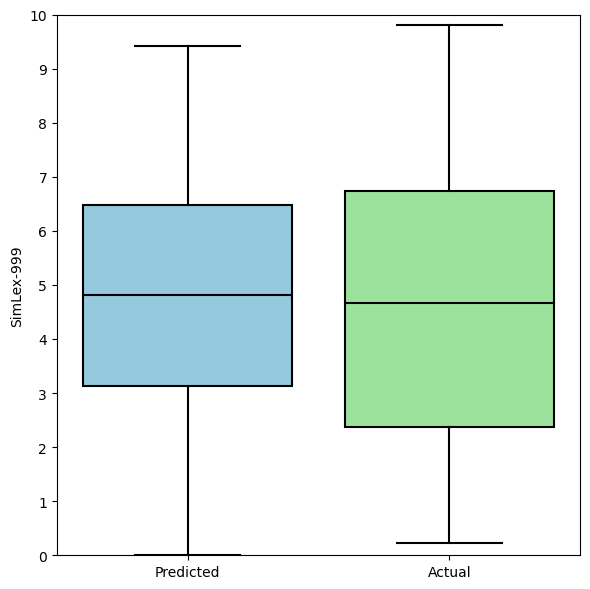

In [153]:
# Rename columns and copy
renamed_pred_sl = predicted.rename(columns={"pred_sl": "SimLex-999"}).copy()
renamed_act_sl = actual.rename(columns={"act_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_pred_sl['Score'] = 'Predicted'
renamed_act_sl['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_pred_sl, renamed_act_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

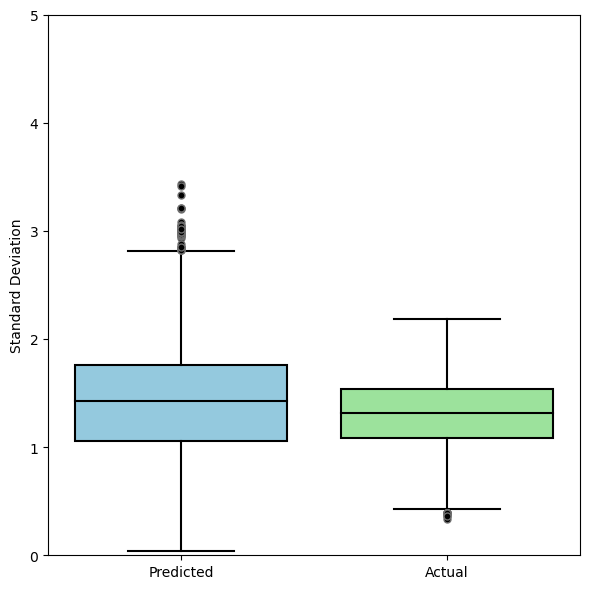

In [154]:
# Rename columns and copy
renamed_predicted_sd = predicted.rename(columns={"pred_sd": "Standard Deviation"}).copy()
renamed_actual_sd = actual.rename(columns={"act_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_predicted_sd['Score'] = 'Predicted'
renamed_actual_sd['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_predicted_sd, renamed_actual_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Distributions**

#### **4.1. SimLex-999**

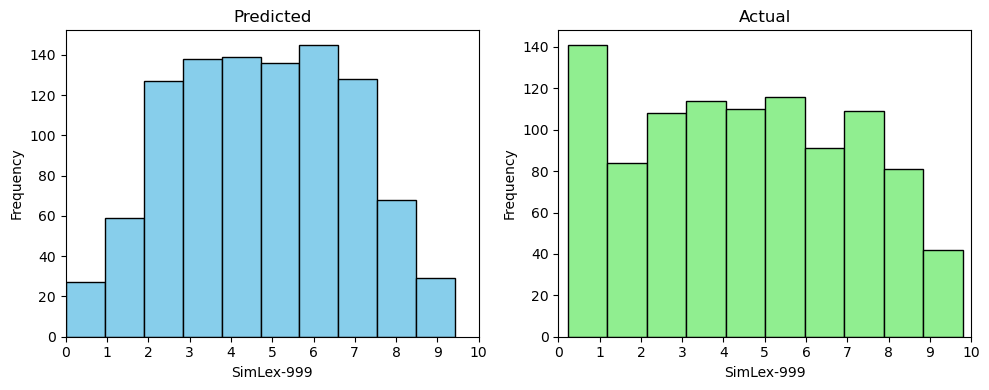

In [155]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot predicted histogram
axes[0].hist(renamed_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_act_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **4.2. Standard Deviation**

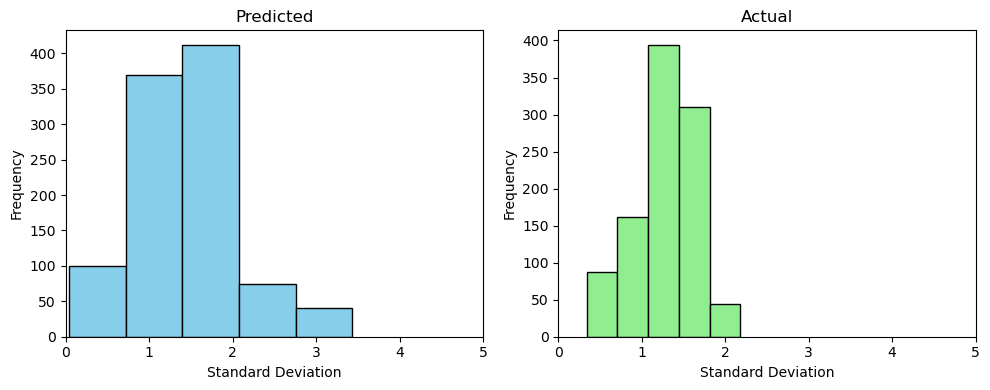

In [156]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot predicted histogram
axes[0].hist(renamed_predicted_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_actual_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **5. Outliers**

#### **5.1. Predicted**

In [157]:
# Count outliers
print_outlier_counts(predicted)

Outliers in pred_sd: 34
No outliers found in columns: pred_sl


In [158]:
# Row outliers
print_outlier_data(predicted, 'pred_sd')


Outliers in pred_sd:
          word1       word2  pred_sl  pred_sd
108        wife     husband     6.83     3.08
110       groom       bride     6.08     3.43
112       south       north     6.68     2.95
114       uncle        aunt     7.12     3.04
115       horse        mare     5.67     2.93
116      bottom         top     7.11     3.01
117      friend       buddy     7.44     2.95
118     student       pupil     7.27     2.96
122       woman         man     7.61     3.04
124     actress       actor     7.82     3.05
125     teacher  instructor     6.77     2.85
126       movie        film     7.05     2.98
135      sunset     sunrise     5.99     3.02
137         cow      cattle     5.90     2.82
144     disease   infection     4.67     2.83
147        lady   gentleman     6.84     3.33
149      priest        monk     6.15     2.96
611  politician   president     5.64     2.85
651       proof        fact     6.03     3.03
776      listen        hear     6.42     2.97
778       oc

#### **5.2. Actual**

In [159]:
# Count outliers
print_outlier_counts(actual)

Outliers in act_sd: 13
No outliers found in columns: act_sl


In [160]:
# Row outliers
print_outlier_data(actual, 'act_sd')


Outliers in act_sd:
           word1      word2  act_sl  act_sd
9           easy  difficult    0.58    0.36
173          rod    curtain    3.03    0.39
186        motel        inn    8.17    0.39
280         mink        fur    6.83    0.39
328        beach     island    5.60    0.39
360          oak      maple    6.03    0.39
492         door      floor    1.67    0.39
526      drizzle       rain    9.17    0.39
527        adult       baby    2.22    0.39
536  frustration      anger    6.50    0.39
537        river        sea    5.72    0.39
724         task      woman    0.68    0.34
981    cooperate       join    5.18    0.36


#### **5.3. Add to Summary**

In [161]:
# Calculate outliers
outliers_pred_sl = calculate_outliers(predicted, 'pred_sl')
outliers_pred_sd = calculate_outliers(predicted, 'pred_sd')
outliers_act_sl = calculate_outliers(actual, 'act_sl')
outliers_act_sd = calculate_outliers(actual, 'act_sd')

# Count outliers
count_outliers_pred_sl = outliers_pred_sl.shape[0]
count_outliers_pred_sd = outliers_pred_sd.shape[0]
count_outliers_act_sl = outliers_act_sl.shape[0]
count_outliers_act_sd = outliers_act_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_pred_sl, count_outliers_act_sl, count_outliers_pred_sd, count_outliers_act_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,996.00,996.00,996.00,996.00
mean,4.77,4.56,1.44,1.28
std,2.12,2.61,0.59,0.37
min,0.01,0.23,0.04,0.34
25%,3.14,2.38,1.06,1.08
50%,4.81,4.66,1.43,1.32
75%,6.47,6.74,1.76,1.54
max,9.42,9.80,3.43,2.18
median,4.81,4.66,1.43,1.31
outliers,0.00,0.00,34.00,13.00


### **6. Correlation**

#### **6.1. SimLex-999 vs Standard Deviation**

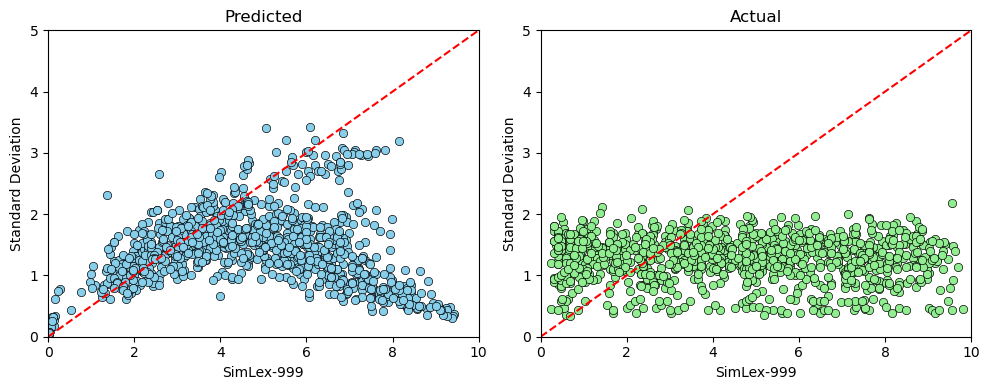

In [162]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='pred_sl', y='pred_sd', data=predicted, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Predicted')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='act_sl', y='act_sd', data=actual, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('Actual')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [163]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(merged, 'pred_sl', 'pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(merged, 'act_sl', 'act_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,pred_sl,pred_sd,-0.05042,0.111781,not significant
1,act_sl,act_sd,-0.04759,0.133376,not significant


### **7. Evaluation Metrics**

#### **7.1. Spearmans's Rank Correlation**

##### **7.1.1. Actual SimLex-999 vs Predicted SimLex-999**

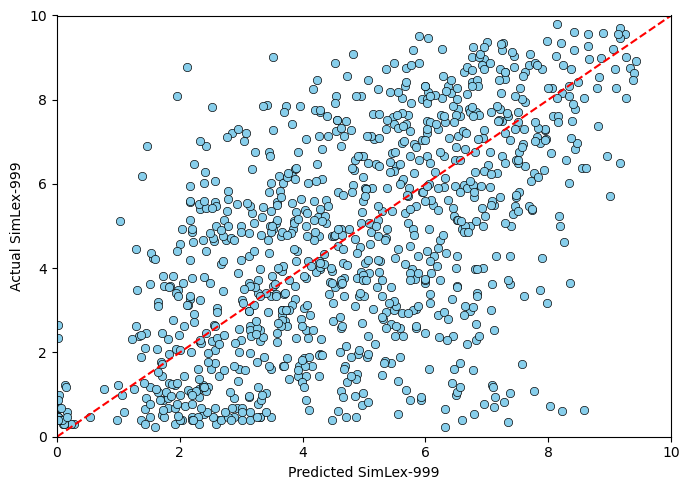

In [164]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sl', 'act_sl', 'Predicted SimLex-999', 'Actual SimLex-999', 0, 10, 0, 10)

In [165]:
# Correlation and pvalue
print_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Spearman's Rank correlation: 0.57393
P-value: 2.5013804699216474e-88
The correlation is statistically significant.



##### **7.1.2. Actual Standard Deviation vs Predicted Standard Deviation**

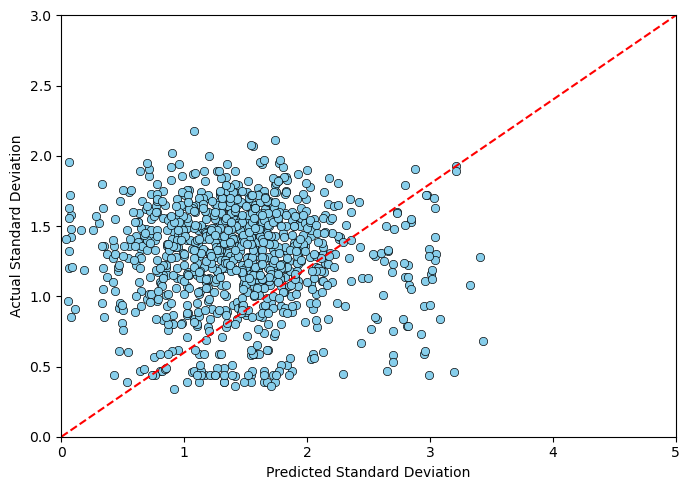

In [166]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sd', 'act_sd', 'Predicted Standard Deviation', 'Actual Standard Deviation', 0, 5, 0, 3)

In [167]:
# Correlation and p-value
print_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Spearman's Rank correlation: -0.02938
P-value: 0.35425800129030127
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [168]:
# Calculate Mean Squared Error
mse = mean_squared_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 4.85


#### **7.3. Mean Absolute Error (MAE)**

In [169]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.74
